In [2]:
import numpy as np # Manipulação de matrizes
import pandas as pd # Manipulação de dataframes
import matplotlib.pyplot as plt #Construção de gráficos
import seaborn as sns #Apoio ao matplotlib para melhora de gráficos


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Métricas para avaliação de algoritmos
                                                                          # de classificação

from sklearn.preprocessing import StandardScaler # Função de Normalização de Dados

from sklearn.model_selection import train_test_split # Método para realização de particionamento da base (holdout)

In [46]:
# Carregar conjunto de dados

df = pd.read_csv('mushrooms.csv')

In [5]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [6]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [47]:
#edible=e, poisonous=p
df["class"].replace({"e": 0, "p": 1}, inplace=True)

#bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
df["cap-shape"].replace({"b": 0, "c": 1, "x": 2, "f": 3, "k": 4, "s": 5}, inplace=True)

#fibrous=f,grooves=g,scaly=y,smooth=s
df["cap-surface"].replace({"f": 0, "g": 1, "y": 2, "s": 3}, inplace=True)

#brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
df["cap-color"].replace({"n": 0, "b": 1, "c": 2, "g": 3, "r": 4, "p": 5, "u": 6, "e": 7, "w": 8, "y": 9}, inplace=True)


df["population"].replace({"v": 0, "y": 1, "s": 2, "n": 3, "a": 4, "c": 5}, inplace=True)

df.head(10)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,2,u
1,0,2,3,9,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,3,g
2,0,0,3,8,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,3,m
3,1,2,2,8,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,2,u
4,0,2,3,3,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,4,g
5,0,2,2,9,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,3,g
6,0,0,3,8,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,3,m
7,0,0,2,8,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,2,m
8,1,2,2,8,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,0,g
9,0,0,3,9,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,2,m


In [48]:
df.corr()

,class,cap-shape,cap-surface,cap-color,population
class,1.000000,0.199488,0.186806,0.058452,-0.446307
cap-shape,0.199488,1.000000,-0.007059,-0.176574,-0.182427
cap-surface,0.186806,-0.007059,1.000000,-0.022923,0.076268
cap-color,0.058452,-0.176574,-0.022923,1.000000,0.045580
population,-0.446307,-0.182427,0.076268,0.045580,1.000000


In [49]:
# Separar base em variáveis explicativas e variável resposta

X = df[['cap-shape', 'cap-surface', 'cap-color', 'population']]

# X = df[['Pregnancies',
#  'Glucose',
#  'BloodPressure',
#  'SkinThickness',
#  'Insulin',
#  'BMI',
#  'DiabetesPedigreeFunction',
#  'Age']]

y = df['class']

In [50]:
# Separar bases em treino e teste

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [51]:
# Importando KNN para CLASSIFICAÇÃO

from sklearn.neighbors import KNeighborsClassifier

In [52]:
# Criar um loop com diversos valores de K

neighbors = np.arange(1, 26)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

print(neighbors)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [53]:
for i, k in enumerate(neighbors):
    
    # Instanciar meu knn
    
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    
    #Treinando o modelo
    knn.fit(X_train_norm, y_train)
    
    # Calcular a acurácia para treino e para teste
    
    
    train_accuracy[i] = f1_score(knn.predict(X_train_norm), y_train)
    
    test_accuracy[i] = f1_score(knn.predict(X_test_norm), y_test)

Text(0, 0.5, 'F1 Score do modelo')

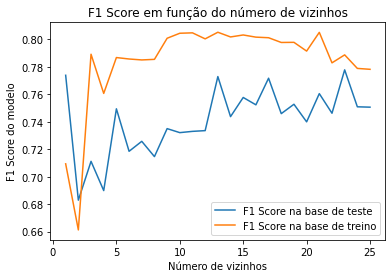

In [54]:
plt.title('F1 Score em função do número de vizinhos')

plt.plot(neighbors, test_accuracy, label='F1 Score na base de teste')

plt.plot(neighbors, train_accuracy, label='F1 Score na base de treino')

plt.legend()

plt.xlabel('Número de vizinhos')


plt.ylabel('F1 Score do modelo')

In [55]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [57]:
print('Acurácia do Modelo =', round(accuracy_score(knn.predict(X_test_norm), y_test),2))
print('F1 Score do Modelo =', round(f1_score(knn.predict(X_test_norm), y_test),2))
print('Precisão do Modelo =', round(precision_score(knn.predict(X_test_norm), y_test),2))
print('Recuperação do Modelo =', round(recall_score(knn.predict(X_test_norm), y_test),2))



Acurácia do Modelo = 0.77
F1 Score do Modelo = 0.74
Precisão do Modelo = 0.64
Recuperação do Modelo = 0.86
